In [13]:
import pandas as pd

df = pd.read_csv("housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [15]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


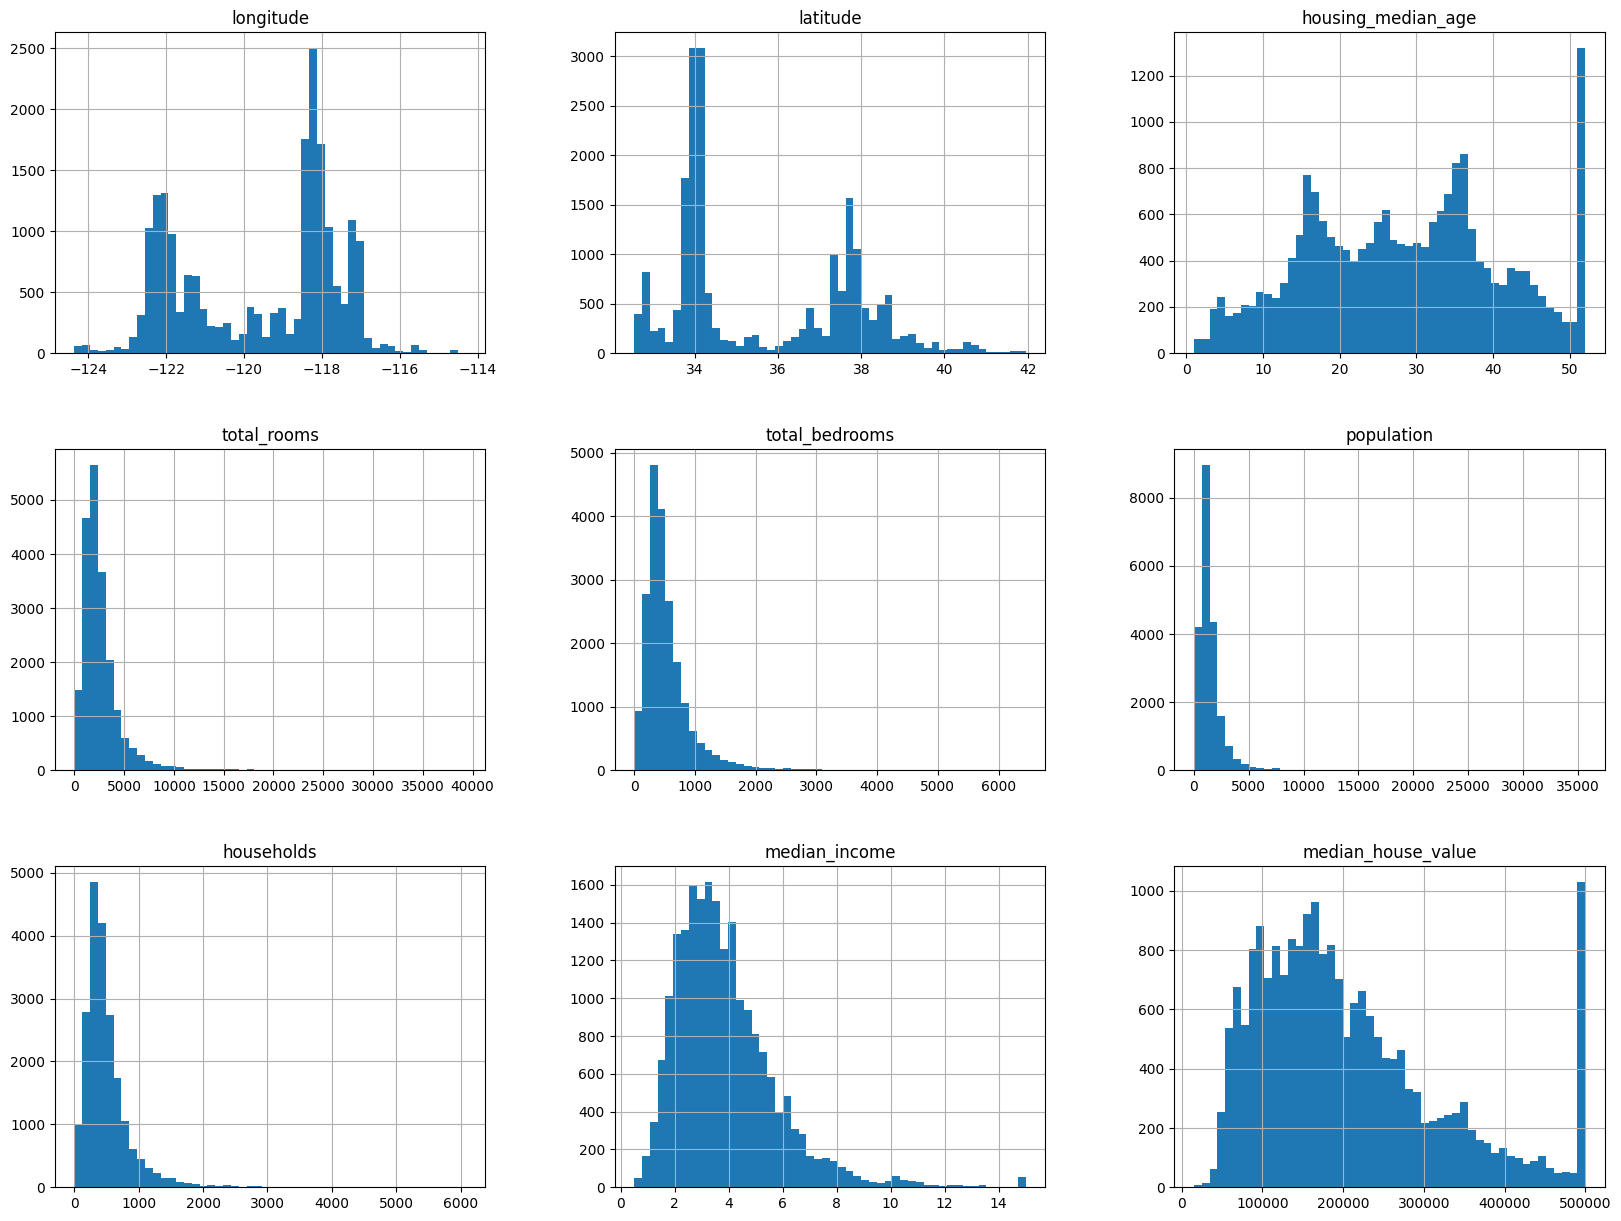

In [16]:
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(20, 15))
plt.show()

### Interpretation of Histograms:

*   **`median_income`**: The histogram for `median_income` will likely show a long tail to the right, indicating that most households have lower to medium incomes, with a smaller number of households having very high incomes. This is a common distribution for income data, often skewed right.

*   **`housing_median_age`**: The histogram for `housing_median_age` might show a bimodal or multimodal distribution, or a concentration at the higher end (52 years). This suggests that there might be two or more common age groups for houses in California, or that a significant portion of the houses are older, reaching the maximum age recorded in the dataset.

### Random vs. Stratified Sampling for Test Set Creation

When creating a test set, the goal is to have a subset of data that accurately represents the overall population. Two common methods for splitting data are random sampling and stratified sampling:

1.  **Random Sampling:**
    *   **How it works**: This method picks data points completely at random from the entire dataset. Each data point has an equal chance of being selected for the test set.
    *   **Use case**: It's generally appropriate when the dataset is large and the features are uniformly distributed, or when there's no concern about preserving the distribution of specific features.
    *   **Pros**: Simple to implement.
    *   **Cons**: For smaller datasets or datasets with skewed distributions, random sampling might inadvertently create test sets that are not representative of the overall data. For example, if a dataset has few instances of a particular category, a purely random split might put all those instances into the training set, leaving the test set with no examples of that category, which would make the model unable to evaluate its performance on that category.

2.  **Stratified Sampling:**
    *   **How it works**: This method divides the dataset into homogeneous subgroups (called "strata") based on one or more important features. Then, it samples an equal proportion of data points from each stratum to create the test set. This ensures that the test set is a representative sample of the population for those specific features.
    *   **Use case**: It is crucial when you want to ensure that the test set accurately reflects the proportions of certain key categories or distributions present in the full dataset. This is especially important for features that are critical for your model's performance or that have imbalanced distributions (e.g., income levels, demographic groups, or rare disease cases).
    *   **Pros**: Ensures that the test set is representative of the population's characteristics, leading to more reliable model evaluation, especially for features that significantly impact the target variable.
    *   **Cons**: More complex to implement as it requires identifying relevant strata and adding extra steps to categorize continuous features if needed.

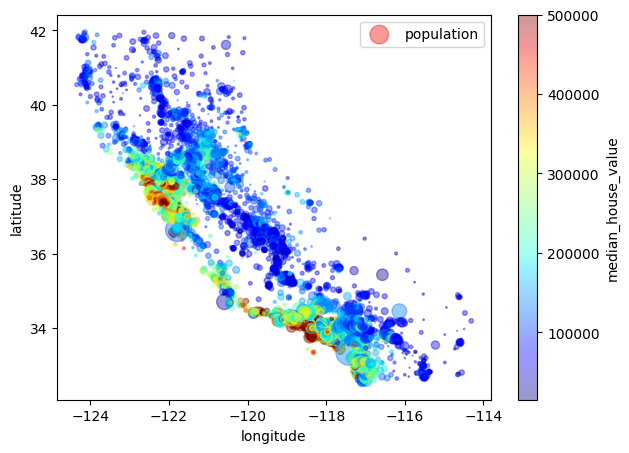

In [18]:
import matplotlib.pyplot as plt
# plot
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=df["population"]/100, label="population", figsize=(7,5),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()

<Axes: xlabel='median_income', ylabel='median_house_value'>

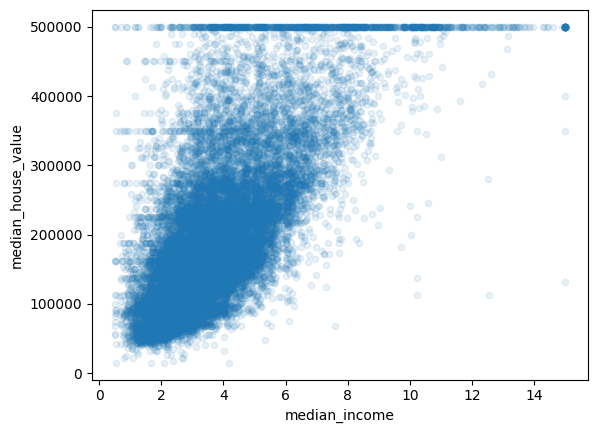

In [20]:
# scatter plot diagram
df.plot(kind='scatter',
             x="median_income", y="median_house_value",
             alpha=0.1)

In [21]:
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]

print("New features created:")
display(df.head())

New features created:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


In [22]:
corr_matrix = df.corr(numeric_only=True)

print("Correlation matrix with new features:")
display(corr_matrix["median_house_value"].sort_values(ascending=False))

Correlation matrix with new features:


,median_house_value
median_house_value,1.000000
median_income,0.688075
rooms_per_household,0.151948
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population_per_household,-0.023737
population,-0.024650
longitude,-0.045967


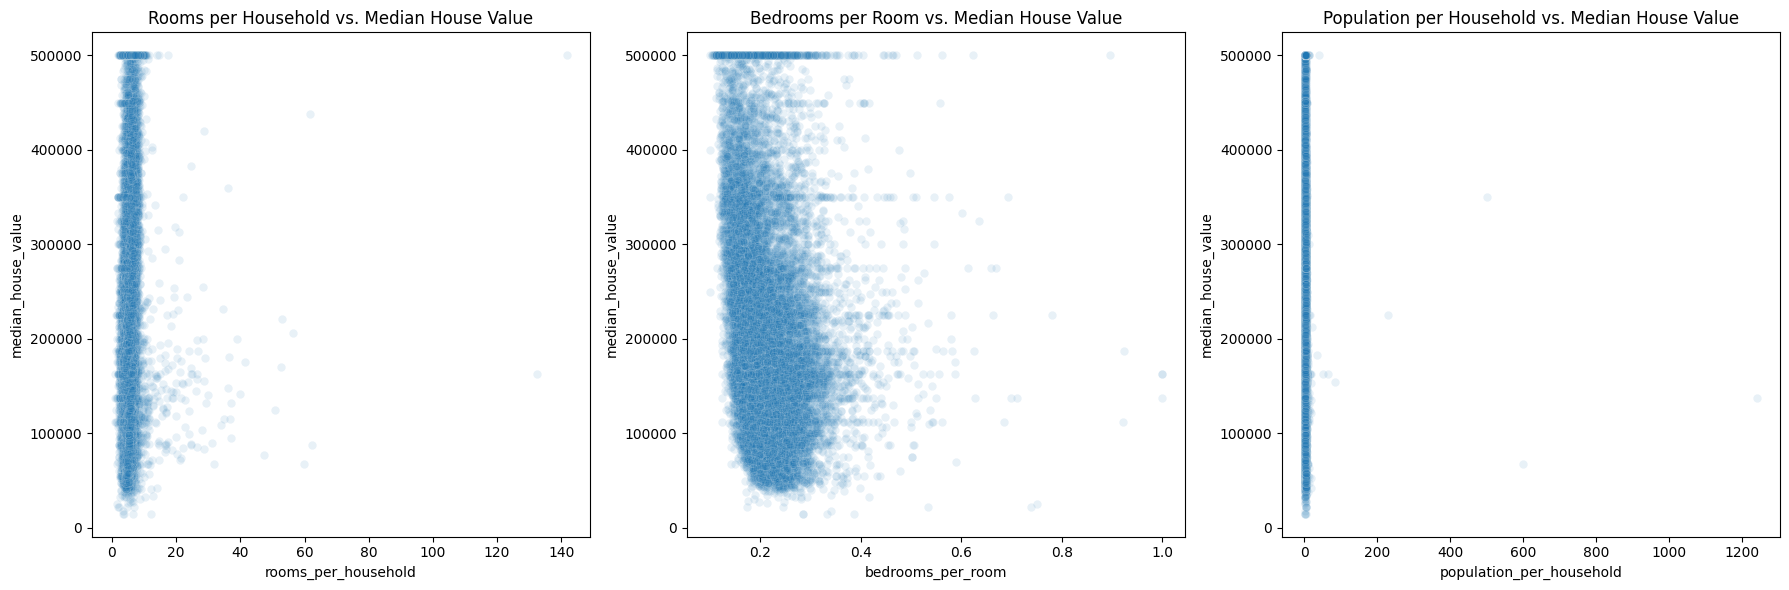

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the new features against median_house_value to visualize correlations

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x="rooms_per_household", y="median_house_value", alpha=0.1)
plt.title('Rooms per Household vs. Median House Value')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x="bedrooms_per_room", y="median_house_value", alpha=0.1)
plt.title('Bedrooms per Room vs. Median House Value')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x="population_per_household", y="median_house_value", alpha=0.1)
plt.title('Population per Household vs. Median House Value')

plt.tight_layout()
plt.show()

In [26]:
print("Original 'total_bedrooms' missing values:")
display(df["total_bedrooms"].isnull().sum())

# 1. Cleaning 'total_bedrooms'
median_bedrooms = df["total_bedrooms"].median()
df["total_bedrooms"] = df["total_bedrooms"].fillna(median_bedrooms)

print("\n'total_bedrooms' missing values after median imputation:")
display(df["total_bedrooms"].isnull().sum())


# 2. Cleaning 'ocean_proximity' (only if it still exists)
if "ocean_proximity" in df.columns:
    print("\nOriginal 'ocean_proximity' unique values and their counts:")
    display(df["ocean_proximity"].value_counts())

    df = pd.get_dummies(df, columns=["ocean_proximity"], dtype=int)

    print("\nDataFrame after one-hot encoding 'ocean_proximity' (first 5 rows):")
    display(df.head())

    print("\nNew columns created from 'ocean_proximity':")
    display([col for col in df.columns if "ocean_proximity_" in col])
else:
    print("\n'ocean_proximity' has already been one-hot encoded.")


Original 'total_bedrooms' missing values:


np.int64(0)


'total_bedrooms' missing values after median imputation:


np.int64(0)


'ocean_proximity' has already been one-hot encoded.


In [28]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [30]:
df["income_cat"] = pd.cut(
    df["median_income"],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1, 2, 3, 4, 5]
)

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]
